# Tips dataset analysis

Description: Fundamentals of Data Analysis - assignment project, GMIT 2019. See README.md for more background info.

>Author: **Andrzej Kocielski**  
>Github: [andkoc001](https://github.com/andkoc001/)  
>Email: G00376291@gmit.ie, and.koc001@gmail.com

Date of creation: 23-09-2019

This Notebook should be read in conjunction with the corresponding README.md file at the assignment repository at GitHub: <https://github.com/andkoc001/Tips_dataset_analysis/>.

___

## Introduction

### The Analysis
This Notebook presents my analysis and interpretation of the _**tips dataset**_. This is done through the following:
1. descriptive statistics of the raw data,
2. graphical representation of the data - plots,
3. inference of the implicit information by application of selected tools, methods and algorithms used in data analytics.


### The data

It is a common custom to offer some small extra money - a tip - to the staff of a restaurant on top of the bill after a satisfactory service received. Although the tips are voluntary, and the amount of the tips is not (usually) stated, by convention it is often advised to leave as a certain percent (e.g. 10%) of the total bill for the meal and service. 

The _tips dataset_ (being analysed in this Notebook) is a representation of tips given in a restaurant. The dataset in question is a record (allegedly real and true) of tips given along with total bills of a restaurant customers collated by a waiter working in the restaurant for several weeks. 

The data is organised in a form of an array, where the dataset attributes (aka features) are organised in columns, and the observations (aka instances) - in rows. The dataset consists of several data categories describing tips received in connection to circumstances, such as day of the week, gender of the tipper, etc. The data set includes 244 data observations.

The _tips dataset_ is integrated with the [Seaborn](https://seaborn.pydata.org/) - an external Python package for data visualisation. This dataset from this source will be used in the subsequent analysis. The dataset, however, can be also obtained from other sources, for example as a .csv file from [here](http://vincentarelbundock.github.io/Rdatasets/datasets.html).

### Hypothesis

The dataset provokes to ask the following question: **Is there a consistent linear relationship between _total bill_ and _amount of tip_?**

Below we will try to find evidences either supporting or the opposite this hypothesis. I will also delve deeper into the question and seek whether I could distinguish such a relationship considering other parameters, such as among smokers and non-smokers. 

###  Assumptions

* The data is accurate.
* The gender and the smoker refers to the person in the group, who payed the bill and left the tip.
* Currency is irrelevant.
* Any other information that might be normally applicable to bill-tip relationship (e.g. country, legislation and regulations, time of the year, etc.) and is not included in the dataset is irrelevant.

___
## Setting up the environment

### Importing additional packages  

The analysis will be conducted using numerical tools, specifically **Python** programming language. On top of that, I am going to use add-on Python libraries - **NumPy** (for numerical calculations), **Pandas** (for convenient data structures - DataFrames), as well as visualisation libraries - **Matplotlib** (its pyplot sub-library) and **Seaborn**.

In [1]:
# numerical calculations libraries, assigning aliases
import numpy as np
import pandas as pd

# plotting and data visualisation libraries, assigning aliases
import matplotlib.pyplot as plt
import seaborn as sns

# below command will allow for the plots being displayed inside the Notebook, rather than in a separate screen.
%matplotlib inline

### Loading the data set

Getting the data from _Seaborn_ package and assigning it to variable `tips`.

In [2]:
# Loading the data set
tips = sns.load_dataset("tips")

### The dataset basic properties and its integrity check 

Prior to actual data analysis, it is a good practice to check the data integrity, that is whether there are any empty cells or corrupted data. We will use for this purpose the Pandas function `info()`, which checks if there is any `null` value in _any_ column. This function also checks data type for each column, as well as number of each data types and number of observations (rows).

In [3]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


Hence, there are no 'empty' cells in the dataset, and the above looks good. Perhaps the _size_ variable could be change to int8 type, so that the memory usage could be optimised, but considering the small size of the dataset, I am going to leave it as is.

The initial checks show its integrity and I am satisfied to continue with further analysis.

___

## Data analysis

### 1. Descriptive statistical analysis

#### Sneak peek into raw data

Below are listed several first raws of data displayed. This listing allows to get initial impression on the dataset structure, as well as its attributes (columns) and data types of the variables.

In [4]:
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


For a quick glimpse into numeric values and basic statistical description, it is convenient to call `describe()` method. As a result it will show for each numerical attribute (column) information such as number of occurrence, minimum, median (50%) and maximum values, mean and standard deviation.

In [5]:
# calling describe method; percentiles will be limited to 50%, to keep the result compact; adapted from https://www.geeksforgeeks.org/python-pandas-dataframe-describe-method/
  
tips.describe(percentiles = [0.5])

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
50%,17.795000,2.900000,2.000000
max,50.810000,10.000000,6.000000


Interesting to see that tips were given every time. Also, the percent of mean tips is $13.16\%$ (=2.998279÷(19.785943+2.998279)).

Now, let's also see what are the unique values occur in each non-numeric (categorical) column, using Pandas' method `unique()`.

In [6]:
print("sex:\t", sorted(tips.sex.unique()))
print("smoker:\t", sorted(tips.smoker.unique()))

sex:	 ['Female', 'Male']
smoker:	 ['No', 'Yes']


In [7]:
# List unique values in the categorical atributes
# Adapted from https://chrisalbon.com/python/data_wrangling/pandas_list_unique_values_in_column/ and https://jovianlin.io/data-visualization-seaborn-part-1/.

print("Values occuring in column 'sex':\t", sorted(tips.sex.unique()))
print("Values occuring in column 'smoker':\t", sorted(tips.smoker.unique()))
print("Values occuring in column 'day':\t", sorted(tips.day.unique()))
print("Values occuring in column 'time':\t", sorted(tips.time.unique()))

Values occuring in column 'sex':	 ['Female', 'Male']
Values occuring in column 'smoker':	 ['No', 'Yes']
Values occuring in column 'day':	 ['Fri', 'Sat', 'Sun', 'Thur']
Values occuring in column 'time':	 ['Dinner', 'Lunch']


#### Raw data modeling

It would be interesting to consider and evaluate the relationship between the data which is not explicitly given. For this purpose, let's model the dataset by creating new attributes. I am going to create the following:
- `tip_ratio` - ratio of tip to bill,
- `sum` - the sum of total bill and tip,
- `percent` - tip as a percent of sum,
- `bpp` - amount of total bill divided by number of people in the group,
- `tpp` - amount of tip per person.

In [8]:
# new column created - percent of tip
tips["tip_ratio"] = tips["tip"]/tips["total_bill"] 

# new column created - sum of total bill and tip
tips["sum"] = tips["total_bill"]+tips["tip"] # appended at the end of the array

# new column created - ratio of tip to sum
tips["percent"] = round(tips["tip"]/tips["sum"]*100, 2)

# add column: bpp - bill per person
tips["bpp"] = tips["total_bill"]/tips["size"]

# add column: tpp - tip per person
tips["tpp"] = tips["tip"]/tips["size"]


Now, let's see what the dataset array looks like with the additional attributes. To keep it compact, just a few first rows.

In [9]:
tips.head(2)

,total_bill,tip,sex,smoker,day,time,size,tip_ratio,sum,percent,bpp,tpp
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447,18.0,5.61,8.495000,0.505000
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542,12.0,13.83,3.446667,0.553333


Let's use the `describe()` method again for the upgraded data array.

In [10]:
# calling describe method; percentiles will be limited to 50%, to keep the result compact
tips.describe(percentiles = [0.5])

,total_bill,tip,size,tip_ratio,sum,percent,bpp,tpp
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.00000,244.000000
mean,19.785943,2.998279,2.569672,0.160803,22.784221,13.643320,7.88823,1.212762
std,8.902412,1.383638,0.951100,0.061072,9.890116,4.058544,2.91435,0.491705
min,3.070000,1.000000,1.000000,0.035638,4.070000,3.440000,2.87500,0.400000
50%,17.795000,2.900000,2.000000,0.154770,20.600000,13.405000,7.25500,1.107500
max,50.810000,10.000000,6.000000,0.710345,60.810000,41.530000,20.27500,3.333333


From the above we can get some interesting observations:
1. on average for the entire dataset, the percent of tip is $13.64\%$ (which is slightly higher than the value calculated above for mean tip and mean total bill),
2. on average, total bill split equally in the group is 7.89,
3. on average, tip per person is 1.21.

For comparison, I am going to apply a filter and see what is, for example, the average ratio tip to total bill among smokers.

In [11]:
# mean tip per smoking person
print("Average tip per smoking person:\t\t\t", tips[tips["smoker"] == "Yes"]["tpp"].mean()) # filtering by applying conditional check (smoker=yes)

# mean total bill among smokers
print("Average total bill among smokers:\t\t", tips[tips["smoker"] == "Yes"]["total_bill"].mean())

# mean ratio among smokers
tips["ratio_smoke"] = tips[tips["smoker"] == "Yes"]["tip"] / tips[tips["smoker"] == "Yes"]["total_bill"]
print("Average ratio tip to total bill among smokers:\t", tips["ratio_smoke"].mean())

Average tip per smoking person:			 1.2977956989247312
Average total bill among smokers:		 20.756344086021507
Average ratio tip to total bill among smokers:	 0.1631960446368779


Interesting. It turns out, the smokers are more generous and pay more for the service as well as give higher tips. On average the ratio tip to total bill among smokers is $16.32\%$.

### 2. Graphical interpretation 

Some information can be revealed easily by visualising the data graphically on carefully crafted plots, according to the popular saying "A single plot is worth a thousand of data points". 

In this section, we will first look at the raw data in the set. The attempt made here is to visualise the figures, applying only built-in analytical tools. My intention is to draw attention to some interesting (in my view) and yet rather straightforward relationships between the data. Later on, I will try to apply more sophisticated analytical tools - specifically liner regression, with aim to reveal some less obvious relationships and patterns existing in the dataset.

For a better readability, let's change the Seaborn global plots style as follows (https://seaborn.pydata.org/tutorial/aesthetics.html, https://www.datacamp.com/community/tutorials/seaborn-python-tutorial)

In [12]:
sns.set_style("darkgrid") # plot style
sns.set_palette("muted") # palette of colours

# reference: https://seaborn.pydata.org/tutorial/color_palettes.html, https://stackoverflow.com/a/47955814

#### Bar plots

Bar plots (also histograms, although not being the same class of graphs, [reference](https://keydifferences.com/difference-between-histogram-and-bar-graph.html)) allow to easily display the categorical variables and showing their distributions, especially in comparison with one or more similar categories of data. 

To begin with, let us see the tips distribution on a histogram, using `distplot` method. With a large number of bins, the tips intervals will be more precise, and it still clearer than `countplot` method.

No handles with labels found to put in legend.


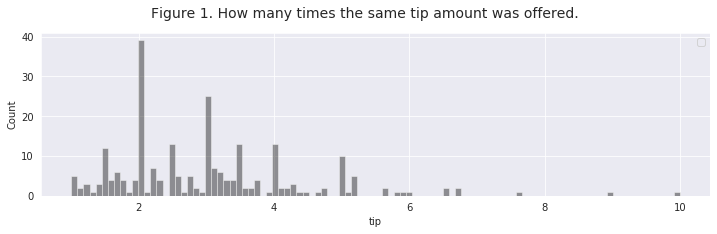

In [13]:
# Display setting
plt.subplots(figsize=(12,3))
plt.legend(prop={'size': 10})
plt.suptitle("Figure 1. How many times the same tip amount was offered.", y=1.0, fontsize=14)
#plt.xlabel('Tip')
plt.ylabel('Count')

# plot data and properties
sns.distplot(tips['tip'], bins=100, kde=False, color="k")

plt.show()

From the above figure (Fig.1) we can see that distinctly the most popular tip is 2 (units of currency), with a runner up at 3 (units of currency).

In the below figure (Fig. 2), there is shown the distribution between parties size on the left plot, and on the right plot - distribution of smokers and non-smokers among all the customers, further broken down on the tippers' gender. For this purpose `seaborn.countplot()` function is used ([Seaborn documentation](https://seaborn.pydata.org/generated/seaborn.countplot.html)). 

The below plots show the number of customers split onto days the restaurant was open. The second plot is further broken down by the size of the party (colour coded - see the legend).

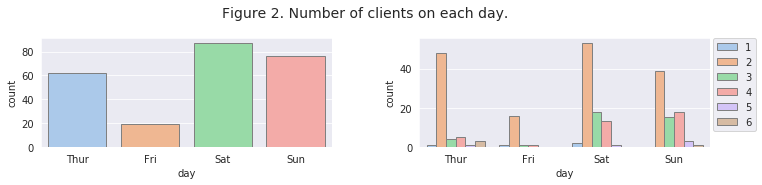

In [14]:
# Display setting
fig, ax = plt.subplots(ncols=2, figsize=(12, 2))
plt.suptitle("Figure 2. Number of clients on each day.", y=1.1, fontsize=14)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.3, hspace=None)

# plot data and propertiesy
sns.countplot(data=tips, x="day", palette="pastel", edgecolor=".5", ax=ax[0]) # number of clients on each day
sns.countplot(data=tips, x="day", palette="pastel", edgecolor=".5", hue='size', ax=ax[1]) # additional discrimination on party sizy
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.) # Put the legend out of the figure, taken from https://stackoverflow.com/a/34579525

plt.show()

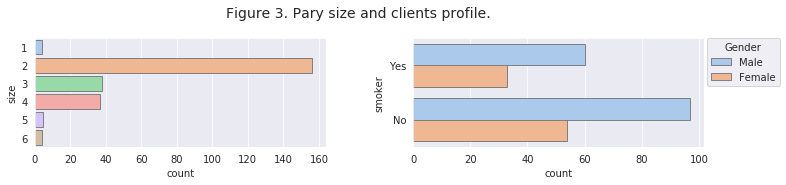

In [15]:
# Display setting
fig, ax = plt.subplots(ncols=2, figsize=(12, 2))
plt.suptitle("Figure 3. Pary size and clients profile.", y=1.1, fontsize=14)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.3, hspace=None)


# plot data and properties
sns.countplot(data=tips, y="size", palette="pastel", edgecolor=".5", ax=ax[0]) # number of clients on each day
sns.countplot(data=tips, y="smoker", palette="pastel", edgecolor=".5", hue="sex", ax=ax[1]) # additional discrimination on party sizy
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.0, title="Gender") # Put the legend out of the figure, taken from https://stackoverflow.com/a/34579525

plt.show()

As we can see, two-person groups dominate among the restaurant clients, but three- and four-person size parties are also frequent.Concerning the tipper gender and smoking habits, it turns out that it is males that usually pay the bill. Also, the number of non-smokers outbalance the number of smoking tippers.

Below, we see amount of tip offered each day, further broken down on whether the client was a smoker or not. A convenient tool for illustrating categorical data is `seaborn.barplot()` method ([Seaborn docs](https://seaborn.pydata.org/generated/seaborn.barplot.html)), and it will be used in this case. The top (the length of the bars) of the bars represent the _mean_ (in the below plots, default) of the attribute. On top of that, _Seaborn_ allows to show _confidence interval_ of the feature as well - the length of the black line. The default value of 95% confidence intervals is used in the plots below.

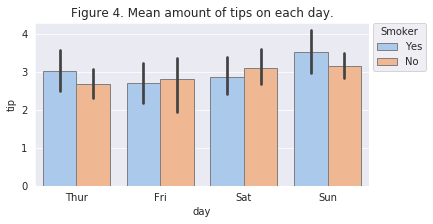

In [16]:
# adapted from https://medium.com/@neuralnets/data-visualization-with-python-and-seaborn-part-1-29c9478a8700
fig, ax = plt.subplots(ncols=1, figsize=(6,3))
plt.title('Figure 4. Mean amount of tips on each day.')

# Mean amount of tip on each day
sns.barplot(data = tips, x = "day", y = "tip", hue="smoker", palette="pastel", edgecolor=".5")
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.0, title="Smoker") # legend put outside of the plot area

plt.show()

#### Scatter plots  

Scatter plots allow for relating two (or more) numerical variables. In the below plots, function `seaborn.relplot()` is used, with the default kind of the plot (scatter),  to show statistical relationship between amount of tip on y-axis and total bill on x-axis. This section is based on official Seaborn [tutorial](https://seaborn.pydata.org/tutorial/relational.html).

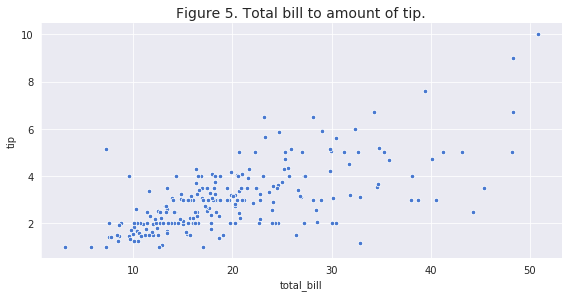

In [17]:
sns.relplot(data=tips, x="total_bill", y="tip", s=20, palette="pastel", height=4, aspect=2)
plt.title("Figure 5. Total bill to amount of tip.", fontsize=14)
plt.show()

The above plot may appear over crowded with data points. By adding another variable (for example _smoker_) it may become clearer and unveil a potential pattern, further separated by days.

The above plot indeed seem to show a linear relationship between the two variables. Before verifying that (calculation the minimum _cost_ value) in the next section, let's take a look at some other also interesting plots.

/home/ak/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


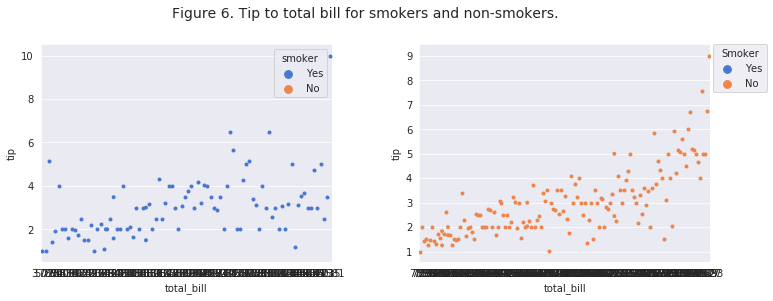

In [18]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 4))
plt.suptitle("Figure 6. Tip to total bill for smokers and non-smokers.", y=1.01, fontsize=14)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.3, hspace=None)

# plot #1 - Smokers
sns.swarmplot(x="total_bill", y="tip", hue="smoker", palette="muted", marker="o", s=4, data=tips[tips["smoker"] == "Yes"], ax=ax[0])

# plot #2 - Non-smokers
sns.swarmplot(x="total_bill", y="tip", hue="smoker", palette="muted", marker="o", s=4, data=tips[tips["smoker"] == "No"], ax=ax[1])
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.0, title="Smoker") # legend put outside of the plot area

fig.show()

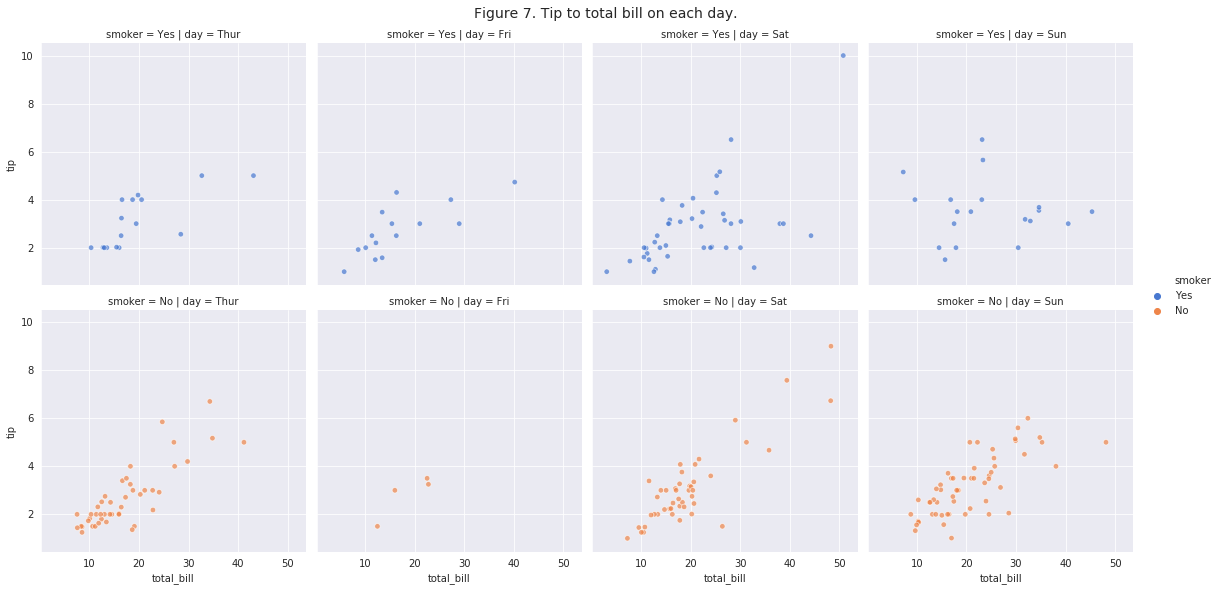

In [19]:
g = sns.relplot(data=tips, x="total_bill", y="tip", col="day", row="smoker", hue="smoker", palette="muted", marker="o", alpha=.7, s=30, height=4, aspect=1)

# Figure title; adopted from https://stackoverflow.com/a/54213918
g.fig.suptitle("Figure 7. Tip to total bill on each day.", x=0.5, y=1.02, fontsize=14)

plt.show()

Except for Sunday smokers plot, which looks a bit random, there seems to be a distinct positive relationship between the total bill and the amount of tip.

What about the amount of tips compared to the size of the party on given days? Can we see any pattern there? We will apply `catplot()` method to generate plots.

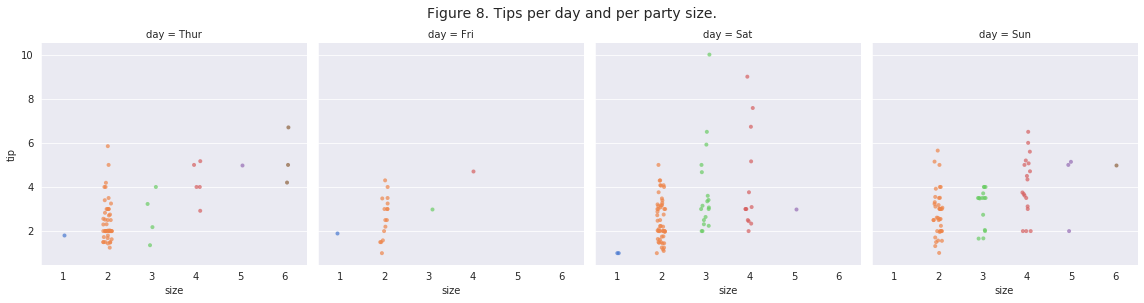

In [20]:
g = sns.catplot(data=tips, x="size", y="tip", col="day", palette="muted", alpha=.7, s=4, height=4, aspect=1)

# Figure title
g.fig.suptitle("Figure 8. Tips per day and per party size.", x=0.5, y=1.04, fontsize=14)

plt.show()

From the above plots, it appear there indeed is a relationship.

### 3.1 Regression

Regression allows to analyse the relationship between one variable (dependent variable) and other variables (independent variables, may be more than one).

#### Minimising the cost

This part is based on the lecture concerning linear regression and the lecturer's [Notebook](https://github.com/ianmcloughlin/jupyter-teaching-notebooks/raw/master/simple-linear-regression.ipynb).

In this section I will test the hypothesis question stated above (what is the relationship (if any) between total bill and amount of tips), by estimating a regression line between the variables. I will see if there is a relationship between the amount of tip and total bill, which could be accurately described with $ y = m x + 1 $ equation. "The number $ m $ is the slope of the line. The slope is how much $ y $ increases by when $ x $ is increased by 1.0. The number $ c $ is the y-intercept of the line."

Taken from the lecturer's [Notebook](https://github.com/ianmcloughlin/jupyter-teaching-notebooks/raw/master/simple-linear-regression.ipynb):

>We want to calculate values of $m$ and $c$ that give the lowest value for the cost value above.
For our given data set we can plot the cost value/function.
Recall that the cost is:  
> $$ Cost(m, c) = \sum_i (y_i - mx_i - c)^2 $$
>This is a function of two variables, $m$ and $c$, so a plot of it is three dimensional. (...)  
>In the case of fitting a two-dimensional line to a few data points, we can easily calculate exactly the best values of $m$ and $c$. (...)  
We first calculate the mean (average) values of our $x$ values and that of our $y$ values.
Then we subtract the mean of $x$ from each of the $x$ values, and the mean of $y$ from each of the $y$ values.
Then we take the *dot product* of the new $x$ values and the new $y$ values and divide it by the dot product of the new $x$ values with themselves.
That gives us $m$, and we use $m$ to calculate $c$.  

We will use `polyfit()` method to calculate $m$ and $c$.

In [21]:
line_eq = np.polyfit(tips["total_bill"], tips["tip"], 1) # fiting a stright line (first degree); assign to a list type

# m is stored in the first item of line_eq (index 0),
# c is stored in the second item of line_eq (index 1).

# Printing results with comment
print("Value of m is", line_eq[0], ", and value of c is", line_eq[1],".")

Value of m is 0.10502451738435332 , and value of c is 0.9202696135546728 .


Putting the scatter plot and the calculated line in one plot.

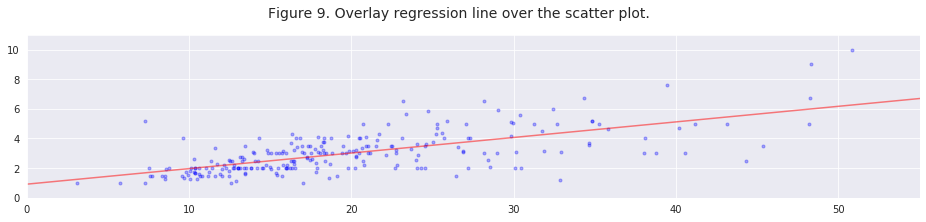

In [22]:
# Display setting
fig, ax = plt.subplots(figsize=(16,3))
plt.suptitle('Figure 9. Overlay regression line over the scatter plot.', x=0.5, y=1.01, fontsize=14)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=None)

# plot #1 - scatter plot
plt.plot(tips["total_bill"], tips["tip"], "b.", alpha=0.3, label="data") # pyplot
#sns.relplot(data=tips, x="total_bill", y="tip", s=20, ax=ax[0]) # seaborn - does not work as intended

# plot #2 - regression line within x-axis range between minimum and maximum total bill values
x = np.linspace(-10, 65, 2) # two values of 'y' for x at -10 and at 65
plt.plot(x, line_eq[0]*x + line_eq[1], 'r-', alpha=0.5); # drawing the regression line with calculated minimum cost; pyplot
#sns.lineplot(x, line_eq[0]*x + line_eq[1], ax=ax[0]) # drawing the regression line with calculated minimum cost; seaborn - does not work as intended

# setting plotting limits
ax.set_ylim(0, 11)
ax.set_xlim(0, 55)

plt.show()

#### Seaborn built-in functionality

A very similar plot can be generated with Seaborn's `regplot()` method, which offers a built-in functionality for drawing linear regression line automatically. Once again, let's make a plot showing total bill against tip, with additional regression line to the plot. Based on the Seaborn [tutorial](https://seaborn.pydata.org/tutorial/regression.html).

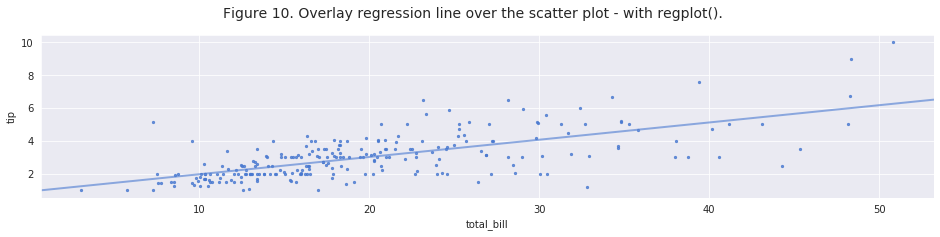

In [23]:
# Display setting
fig, ax = plt.subplots(figsize=(16,3))
plt.suptitle('Figure 10. Overlay regression line over the scatter plot - with regplot().', x=0.5, y=1.01, fontsize=14)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=None)

sns.regplot(data=tips, x="total_bill", y="tip", ci=0, scatter_kws={"s": 5}, line_kws={"lw":2, "alpha":0.6}) # confidence interval set to 0 for clarity
plt.show()

Let's now take a look at other, arguably more interesting plots that can be produced from the dataset.

First, let us now consider the data with variables discrimination on day and whether the client was a smoker or not.

<Figure size 432x288 with 0 Axes>

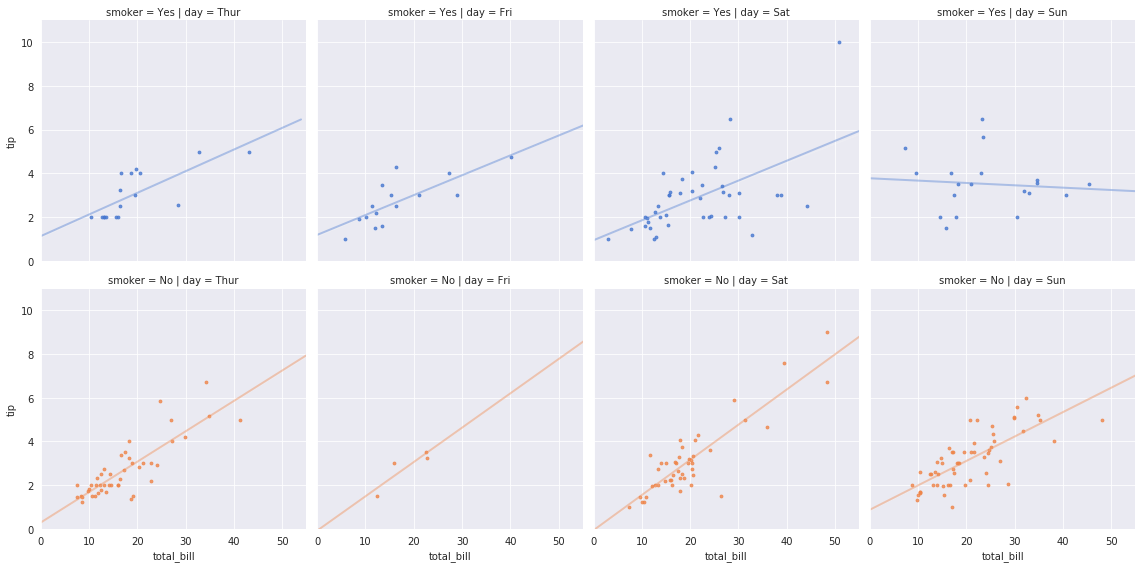

In [24]:
# Display setting
#fig, lm = plt.subplots(figsize=(16,3))
plt.suptitle('Figure 11. Overlay regression line over the scatter plot.', x=0.5, y=1.01, fontsize=14)

# adapded from https://stackoverflow.com/a/25213438
lm = sns.lmplot(data=tips, x="total_bill", y="tip", col="day", row="smoker", hue="smoker", ci=0, height=4, aspect=1, palette="muted", scatter_kws={"s":8}, line_kws={"lw":2, "alpha":0.4})

# axes limits
axes = lm.axes
axes[0,0].set_ylim(0,11)
axes[0,0].set_xlim(0,55)

plt.show()

An interesting results yield the next set of plots, showing a tendency of decrease tip amount per person for larger group of people (slope of the regression line).

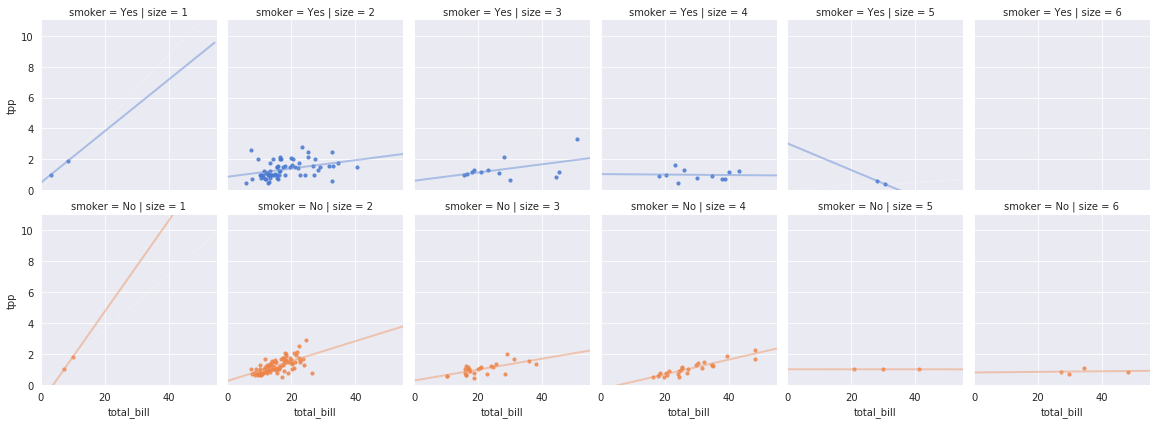

In [25]:
lm = sns.lmplot(data=tips, x="total_bill", y="tpp", col="size", row="smoker", hue="smoker", ci=0, height=3, aspect=.9, palette="muted", scatter_kws={"s":10}, line_kws={"lw":2, "alpha":0.4})

axes = lm.axes
axes[0,0].set_ylim(0,11)
axes[0,0].set_xlim(0,55)

plt.show()

___
### 3.2 k-nearest neighbours algorithm

This section is based on the Programming for Data Analysis, GMIT, lecture videos and the lecturer's [Notebook](https://github.com/ianmcloughlin/jupyter-teaching-notebooks/raw/master/pandas-with-iris.ipynb).  

Other consulted references:  
[Machine Learning Basics with the K-Nearest Neighbors Algorithm](https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761)  
[K-Nearest Neighbors Algorithm Using Python](https://www.edureka.co/blog/k-nearest-neighbors-algorithm/)
[K-Nearest Neighbors Algorithm in Python and Scikit-Learn](https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/)

_k-nearest neighbours_ is a supervised machine learning algorithms. It is used to solve a classification problem. It produces a discreet output (that is: either this or that class (there may be more classes), but not something in between). 

#### Importing SciKit Learn Library

In [26]:
import sklearn.neighbors as nei
import sklearn.model_selection as mod

In [27]:
tips.head(2)

,total_bill,tip,sex,smoker,day,time,size,tip_ratio,sum,percent,bpp,tpp,ratio_smoke
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447,18.0,5.61,8.495000,0.505000,NaN
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542,12.0,13.83,3.446667,0.553333,NaN


#### A glimpse into plot.  
The below plot - relationship between tip size, total bill and the smoker - is deemed the most suitable for my analysis. The other variables combinations produce more fuzzy plots (a lot of overlapping data points).

In [28]:
#sns.pairplot(tips, hue="smoker")
#plt.show()

Assigning `Inputs` and `Outputs`

In [29]:
inputs = tips[['total_bill', 'tip']]
outputs = tips['sex']

Classifier `knn`

In [30]:
knn = nei.KNeighborsClassifier(n_neighbors=5) # will consider 5 nearest neighbours

Applying `fit` function

In [31]:
knn.fit(inputs, outputs)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

Evaluation of the results

In [32]:
(knn.predict(inputs) == outputs).sum() # Returns number of correctly recognised samples; total number of samples is 244

178

Training and testing data sub-sets.

The dataset is split randomly into:  
1) training (75% of entire dataset size, i.e. 183), and  
2) testing (25%, i.e. 61)

In [33]:
inputs_train, inputs_test, outputs_train, outputs_test = mod.train_test_split(inputs, outputs, test_size=0.25)

In [34]:
knn = nei.KNeighborsClassifier(n_neighbors=5)
knn.fit(inputs_train, outputs_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [35]:
# knn.predict(inputs_test) == outputs_test

In [36]:
answer = (knn.predict(inputs_test) == outputs_test).sum()
answer

40

Hence, the accuracy of the algorithm is the ratio of correctly recognised to actual number, and is shown below.

In [37]:
print("%.02f" % ((answer/61) * 100), "%")

65.57 %


___
## Findings and conclusion

As we can see from the above plots, there seem to be a strong linear relationship between the amount of tip and the total bill for the entire dataset as well as for a number of sub-sets.

___
## References

___
Andrzej Kocielski